Trains a simple convnet on the MNIST dataset.

In [1]:
import numpy as np

In [2]:
from kerasy.datasets import mnist
from kerasy.models import Sequential
from kerasy.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from kerasy.utils import CategoricalEncoder

In [3]:
batch_size = 128
num_classes = 10
epochs = 12
n_samples = 1000

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = np.expand_dims(x_train, axis=-1)
x_test  = np.expand_dims(x_test,  axis=-1)
input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train[:n_samples]
y_train = y_train[:n_samples]
x_test = x_test[:n_samples]
y_test = y_test[:n_samples]

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1000, 28, 28, 1)
1000 train samples
1000 test samples


In [9]:
# convert class vectors to binary class matrices
encoder = CategoricalEncoder()
y_train = encoder.to_onehot(y_train, num_classes)
# y_test  = encoder.to_onehot(y_test, num_classes)

In [10]:
keep_prob = 0.5

In [11]:
model = Sequential()
model.add(Input(input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(keep_prob = keep_prob))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(optimizer='sgd', loss="categorical_crossentropy")

In [13]:
model.summary()

-----------------------------------------------------------------
Layer (type)                 Output Shape              Param #   
input_1 (Input)              (None, 28, 28, 1)         0.0       
-----------------------------------------------------------------
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320.0     
-----------------------------------------------------------------
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496.0   
-----------------------------------------------------------------
maxpooling2d_1 (MaxPooling2D (None, 12, 12, 64)        0.0       
-----------------------------------------------------------------
dropout_1 (Dropout)          (None, 12, 12, 64)        0.0       
-----------------------------------------------------------------
flatten_1 (Flatten)          (None, 9216)              0.0       
-----------------------------------------------------------------
dense_1 (Dense)              (None, 128)               1179776.0 
----------

In [14]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

 Epoch 01/12 | 1000/1000 [####################] 100.00% - 1611.966s  
 Epoch 02/12 | 1000/1000 [####################] 100.00% - 1424.049s  
 Epoch 03/12 | 1000/1000 [####################] 100.00% - 1417.398s  
 Epoch 04/12 | 1000/1000 [####################] 100.00% - 1422.674s  
 Epoch 05/12 | 1000/1000 [####################] 100.00% - 1426.001s  
 Epoch 06/12 | 1000/1000 [####################] 100.00% - 1419.967s  
 Epoch 07/12 | 1000/1000 [####################] 100.00% - 1423.701s  
 Epoch 08/12 | 1000/1000 [####################] 100.00% - 1419.014s  
 Epoch 09/12 | 1000/1000 [####################] 100.00% - 1420.943s  
 Epoch 10/12 | 1000/1000 [####################] 100.00% - 1430.947s  
 Epoch 11/12 | 1000/1000 [####################] 100.00% - 1418.088s  
 Epoch 12/12 | 1000/1000 [####################] 100.00% - 1428.189s  


In [24]:
print(f"Accuracy: {100*np.mean(y_test==np.argmax(model.predict(x_test), axis=1)):.3f}%")

Accuracy: 9.900%


In [35]:
model.layers[1].forward(x_test[3]).shape

(26, 26, 32)

In [37]:
import matplotlib.pyplot as plt

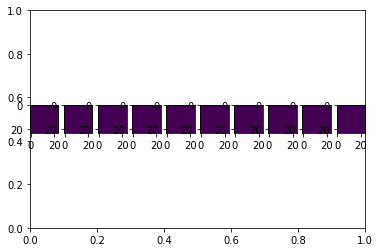

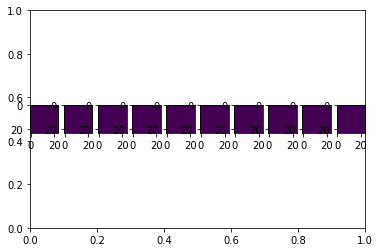

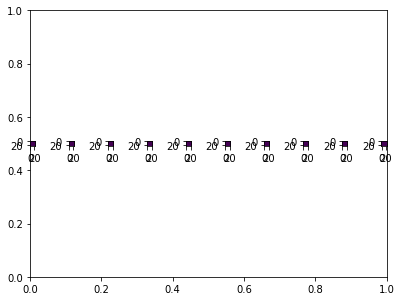

In [48]:
a = model.layers[1].forward(x_test[3])
for i in range(3):
    a = model.layers[1].forward(x_test[i])
    a = model.layers[2].forward(a)
    fig,ax = plt.subplots()
    for j in range(10):
        ax = fig.add_subplot(1,10,j+1)
        ax.imshow(a[:,:,j])
plt.tight_layout()
plt.show()

In [49]:
model.layers[1].kernel[:,:,:,0].shape

(3, 3, 1)